![](https://content.pymnts.com/wp-content/uploads/2017/07/e-commerce-robot.jpg)

<div style="border-radius:10px; padding: 15px; background-color: #d8b26e; font-size:130%; text-align:left">

<h2 align="left"><font color=#006600>Why supermarkets are popular nowadays:</font></h2>

Supermarkets have gained immense popularity in recent years due to their unmatched convenience, offering a diverse range of products all under one roof, from groceries to electronics and clothing. Shoppers are drawn to the abundant variety and choices available, enabling them to select from numerous brands and sizes. Furthermore, supermarkets leverage their purchasing power to provide competitive prices and frequent discounts, making them an attractive option for budget-conscious consumers. With extended operating hours, including late evenings and weekends, they cater to busy schedules. Additionally, their commitment to offering fresh produce, seamless technology integration, exceptional customer experiences, and community engagement initiatives have solidified their appeal. Supermarkets continuously innovate to meet evolving consumer preferences, including the demand for organic and eco-friendly products. Their globalization efforts have also made these shopping havens a familiar and trusted presence in international markets.

<a id="libraries"></a>
# <b><span style='color:#c78a44'> Importing Necessary Libraries</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #d8b26e; font-size:130%; text-align:left">
    
First of all, I will import all the necessary libraries that we will use throughout the project. This generally includes libraries for data manipulation, data visualization, and others based on the specific needs of the project:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<a id="libraries"></a>
# <b><span style='color:#c78a44'> Loading the Dataset</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #d8b26e; font-size:130%; text-align:left">
    
Next, I will load the dataset into a pandas DataFrame which will facilitate easy manipulation and analysis:

In [2]:
df = pd.read_csv("/kaggle/input/super-market-sales/supermarket_sales.csv")

<div style="border-radius:10px; padding: 15px; background-color: #d8b26e; font-size:130%; text-align:left">

<h2 align="left"><font color=#006600>Why supermarkets are popular nowadays:</font></h2>

**Variable**   | **Description**
     
**Invoice ID** | A unique identifier for each invoice or transaction.
    
**Branch**  | The branch or location where the transaction occurred.
    
**City** | The city where the branch is located.
    
**Customer Type**  | Indicates whether the customer is a regular or new customer.
    
**Gender** | The gender of the customer. 

**Product Line** | The category or type of product purchased.

**Unit Price** | The price of a single unit of the product.

**Quantity** | The number of units of the product purchased.

**Tax 5%** | The amount of tax (5% of the total cost) applied to the transaction.

**Total** | The total cost of the transaction, including tax.

**Date** | The date when the transaction took place.

**Time** | The time of day when the transaction occurred.

**Payment** | The payment method used (e.g., credit card, cash).

**COGS (Cost of Goods Sold)** | The direct costs associated with producing or purchasing the products sold.

**Gross Margin Percentage** | The profit margin percentage for the transaction.

**Gross Income** | The total profit earned from the transaction.

**Rating** | Customer satisfaction rating or feedback on the transaction.
    


For instance, if you were interested in predicting customer satisfaction, Rating might be a suitable label. If you were trying to predict sales or revenue, Total or Gross Income could be a potential label.
</div>

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3



<a id="libraries"></a>
# <b><span style='color:#c78a44'> Initial Data Analysis</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #d8b26e; font-size:130%; text-align:left">
    
First I will perform a preliminary analysis to understand the structure and types of data columns:

In [4]:
df.shape

(1000, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [7]:
df['Customer type'].nunique()

2

In [8]:
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [9]:
df['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [10]:
df['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [11]:
df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [12]:
df['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

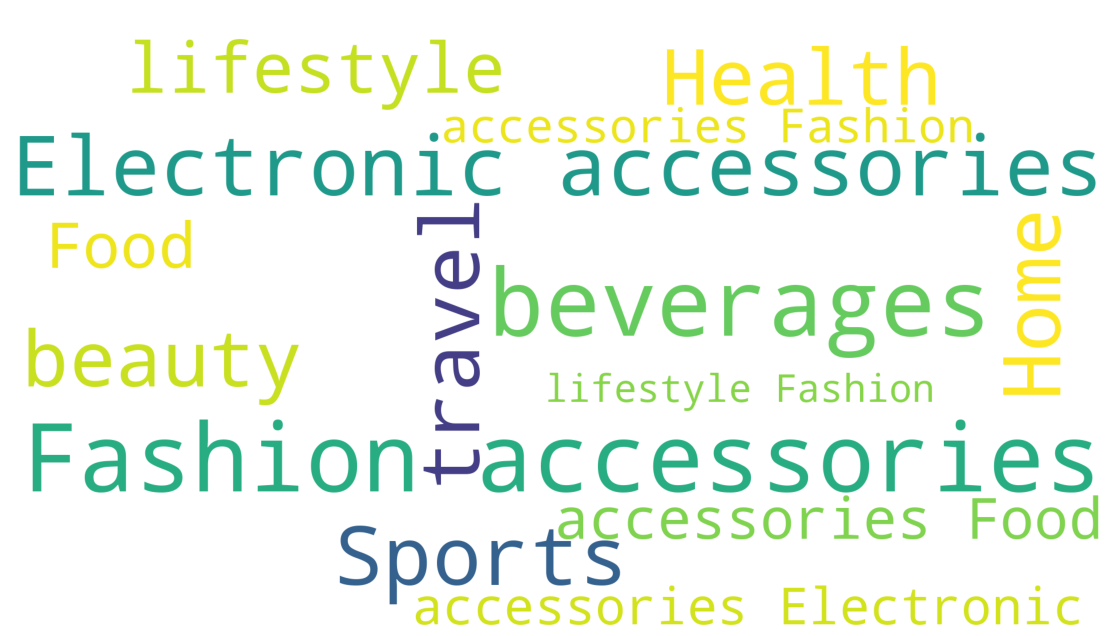

In [13]:
from wordcloud import WordCloud
plt.subplots(figsize=(20,8))
wordcloud = WordCloud(background_color='White',width=1920,height=1080).generate(" ".join(df['Product line']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

<a id="libraries"></a>
# <b><span style='color:#c78a44'> Checking if there are any missing values</span></b>

![](https://e7.pngegg.com/pngimages/875/142/png-clipart-missing-data-diagram-information-imputation-marketing-others-miscellaneous-company-thumbnail.png)

In [14]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

<a id="libraries"></a>
# <b><span style='color:#c78a44'> Exploratory Data Analysis(EDA)</span></b>


<div style="border-radius:10px; padding: 15px; background-color: #d8b26e; font-size:130%; text-align:left">
    
EDA (Exploratory Data Analysis) in simple words is like being a detective for data. It's the process of examining and understanding a dataset before you start building models or making decisions based on the data.

EDA is like exploring a new place, looking for clues, and making sense of what you find before making any important decisions. It's a crucial step in the data analysis process.

<div style="border-radius:10px; padding: 15px; background-color: #d8b26e; font-size:130%; text-align:left">

<h2 align="left"><font color=#006600>SCATTER PLOT</font></h2>

A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

<Axes: xlabel='Unit price', ylabel='Rating'>

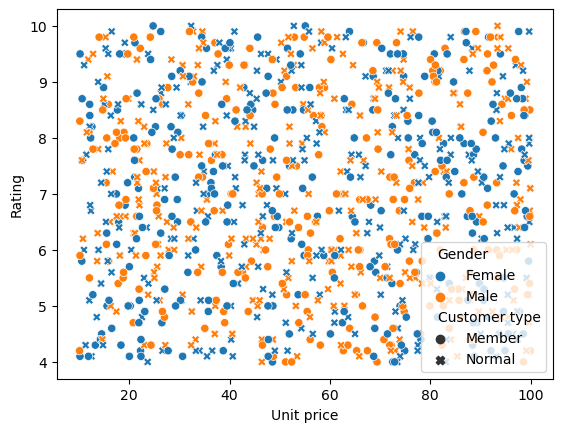

In [15]:
sns.scatterplot(data=df, x='Unit price', y='Rating',hue='Gender',style='Customer type')

<div style="border-radius:10px; padding: 15px; background-color: #d8b26e; font-size:130%; text-align:left">

<h2 align="left"><font color=#006600>BOXPLOT</font></h2>

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). ... It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

<Axes: xlabel='gross income'>

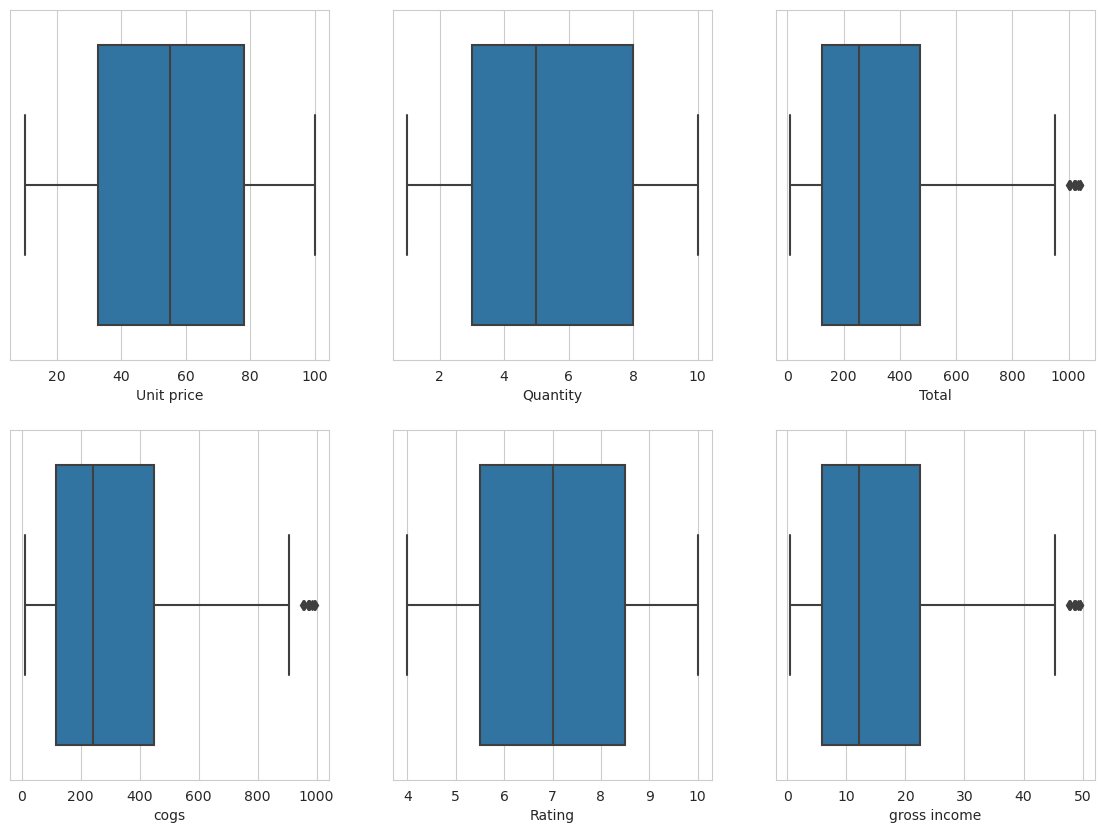

In [16]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Unit price',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='Quantity',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='Total',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='cogs',data=df)
plt.subplot(2,3,5)
sns.boxplot(x='Rating',data=df)
plt.subplot(2,3,6)
sns.boxplot(x='gross income',data=df)

<div style="border-radius:10px; padding: 15px; background-color: #d8b26e; font-size:130%; text-align:left">

<h2 align="left"><font color=#006600>KDEPLOT</font></h2>
    
kdeplot is a data visualization technique that employs Kernel Density Estimation (KDE) to estimate and display the probability density function of continuous data. It produces a smoothed, continuous curve that reveals the underlying distribution's shape and characteristics. This method is particularly useful for exploring data patterns, identifying peaks, and visualizing the density of both univariate and bivariate data. kdeplot offers a complementary perspective to histograms and aids in understanding the distribution of data in a more detailed and visually appealing manner.

<Axes: xlabel='gross income', ylabel='Density'>

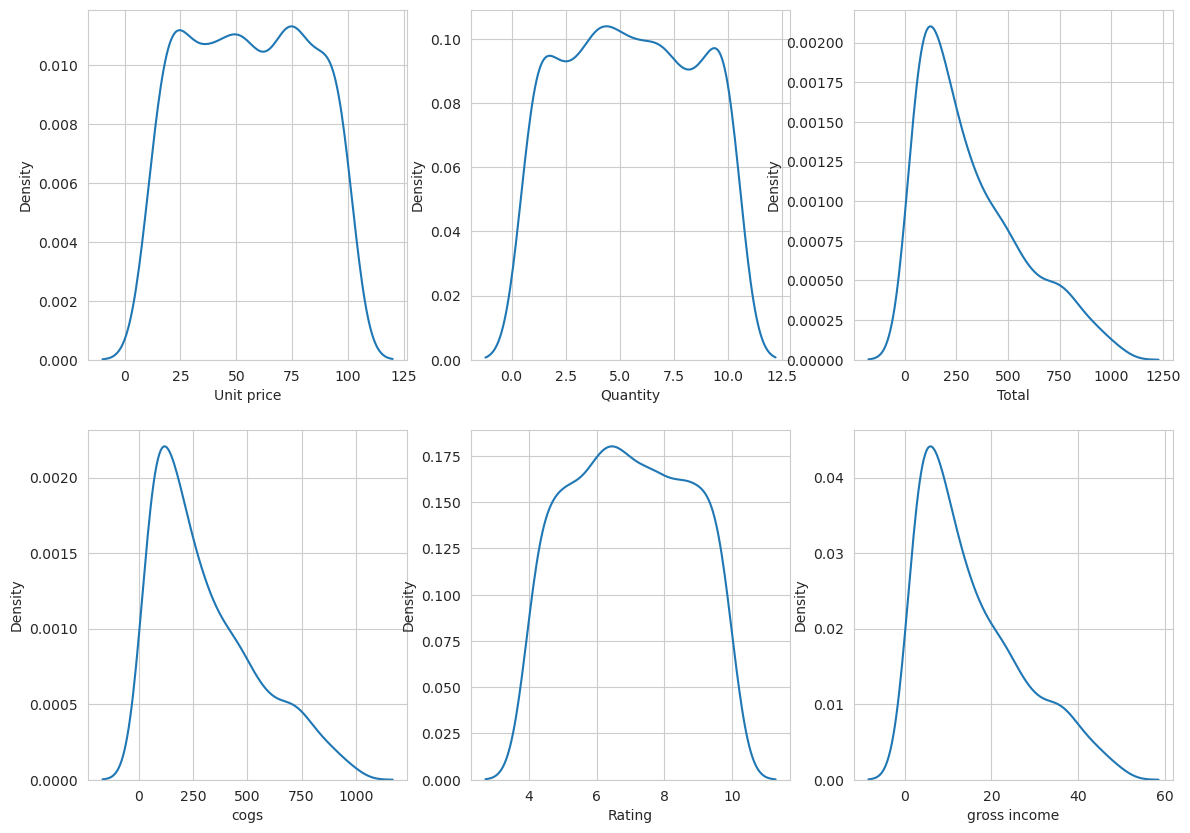

In [17]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.kdeplot(x='Unit price',data=df)
plt.subplot(2,3,2)
sns.kdeplot(x='Quantity',data=df)
plt.subplot(2,3,3)
sns.kdeplot(x='Total',data=df)
plt.subplot(2,3,4)
sns.kdeplot(x='cogs',data=df)
plt.subplot(2,3,5)
sns.kdeplot(x='Rating',data=df)
plt.subplot(2,3,6)
sns.kdeplot(x='gross income',data=df)

<div style="border-radius:10px; padding: 15px; background-color: #d8b26e; font-size:130%; text-align:left">

<h2 align="left"><font color=#006600>PAIRPLOT</font></h2>

A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.

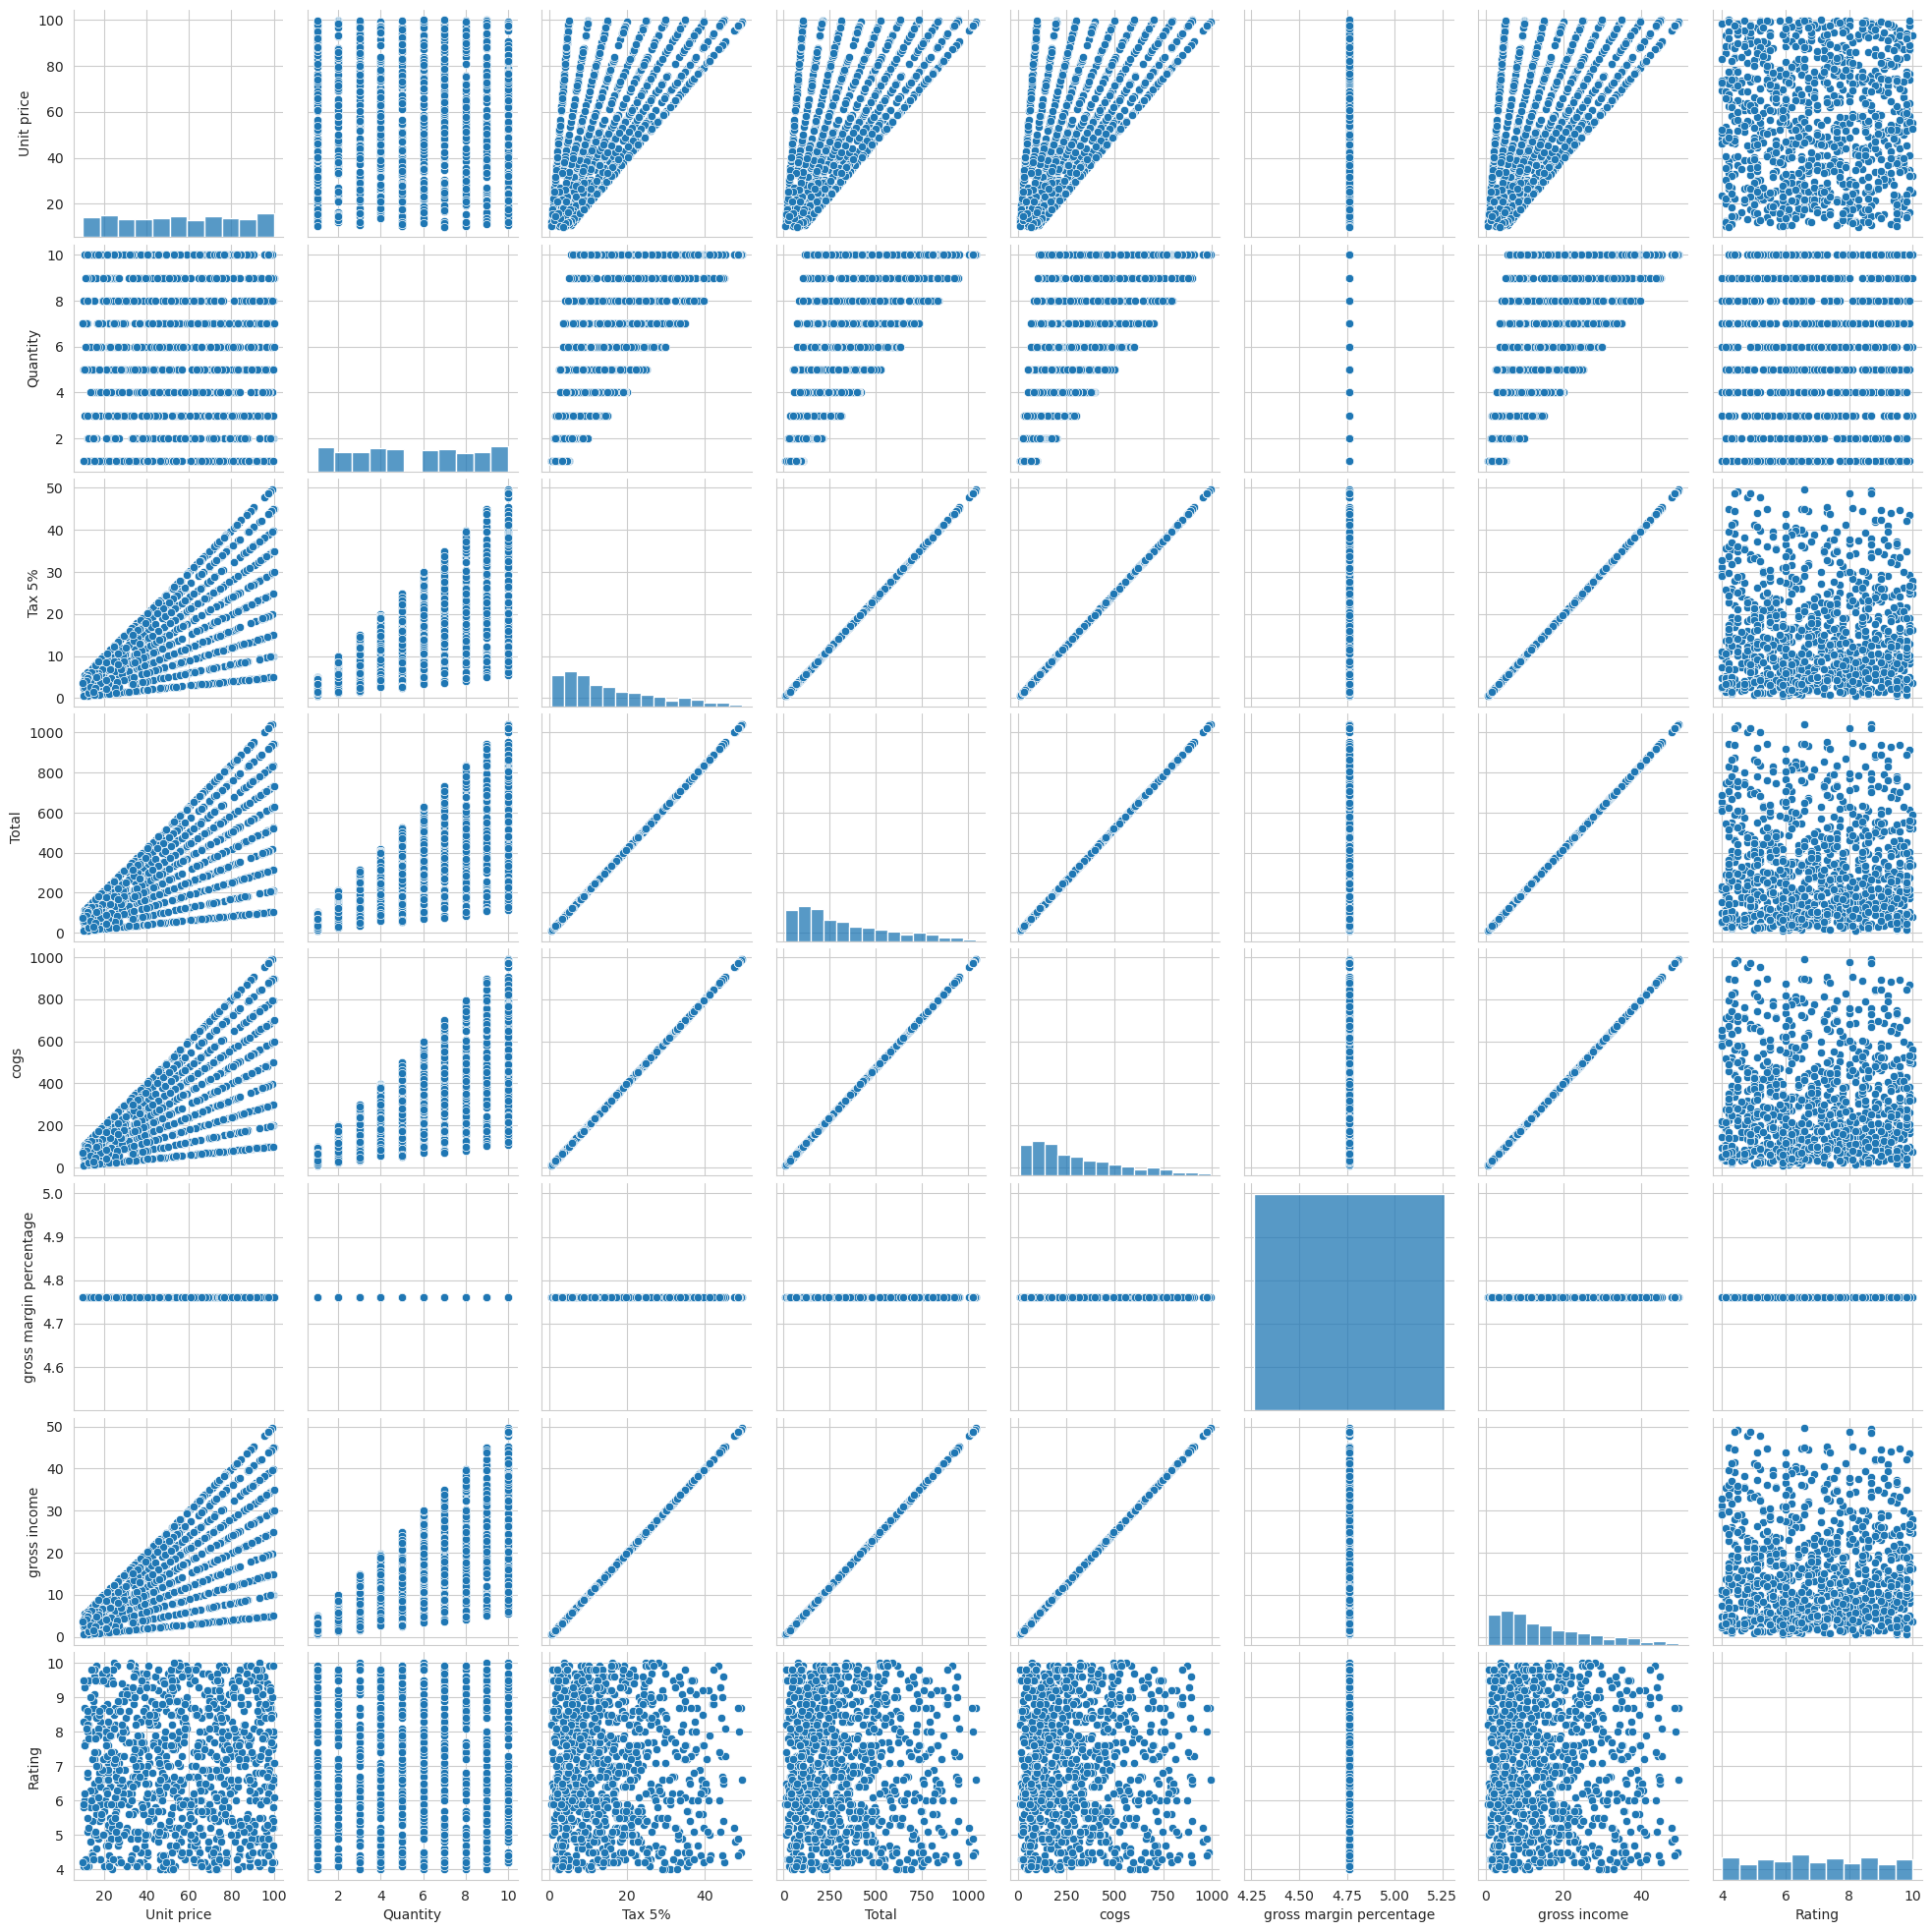

In [18]:
sns.pairplot(data=df)

<div style="border-radius:10px; padding: 15px; background-color: #d8b26e; font-size:130%; text-align:left">

<h2 align="left"><font color=#006600>BARPLOT</font></h2>

A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.



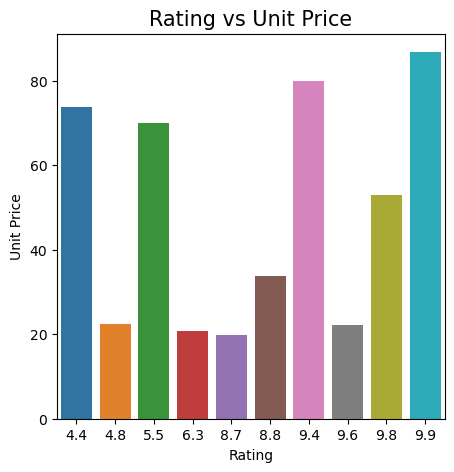

In [19]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Unit price", data=df[170:180])
plt.title("Rating vs Unit Price",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Unit Price")
plt.show()

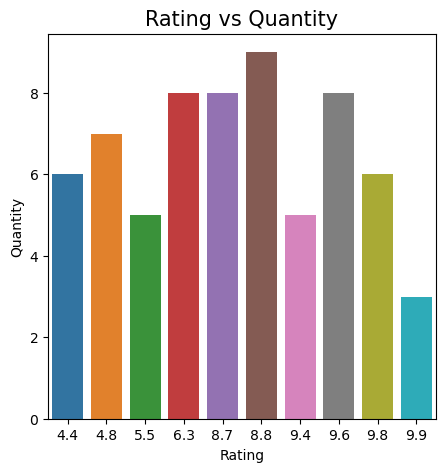

In [20]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Quantity", data=df[170:180])
plt.title("Rating vs Quantity",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Quantity")
plt.show()

<a id="libraries"></a>
# <b><span style='color:#c78a44'> Correlation</span></b>

![](https://www.mathsisfun.com/data/images/correlation-examples.svg)

<div style="border-radius:10px; padding: 15px; background-color: #d8b26e; font-size:130%; text-align:left">

Now, when we train any algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy. Thus features selection should be done carefully. This dataset has less featues but still we will see the correlation.

In [21]:
df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


<Axes: >

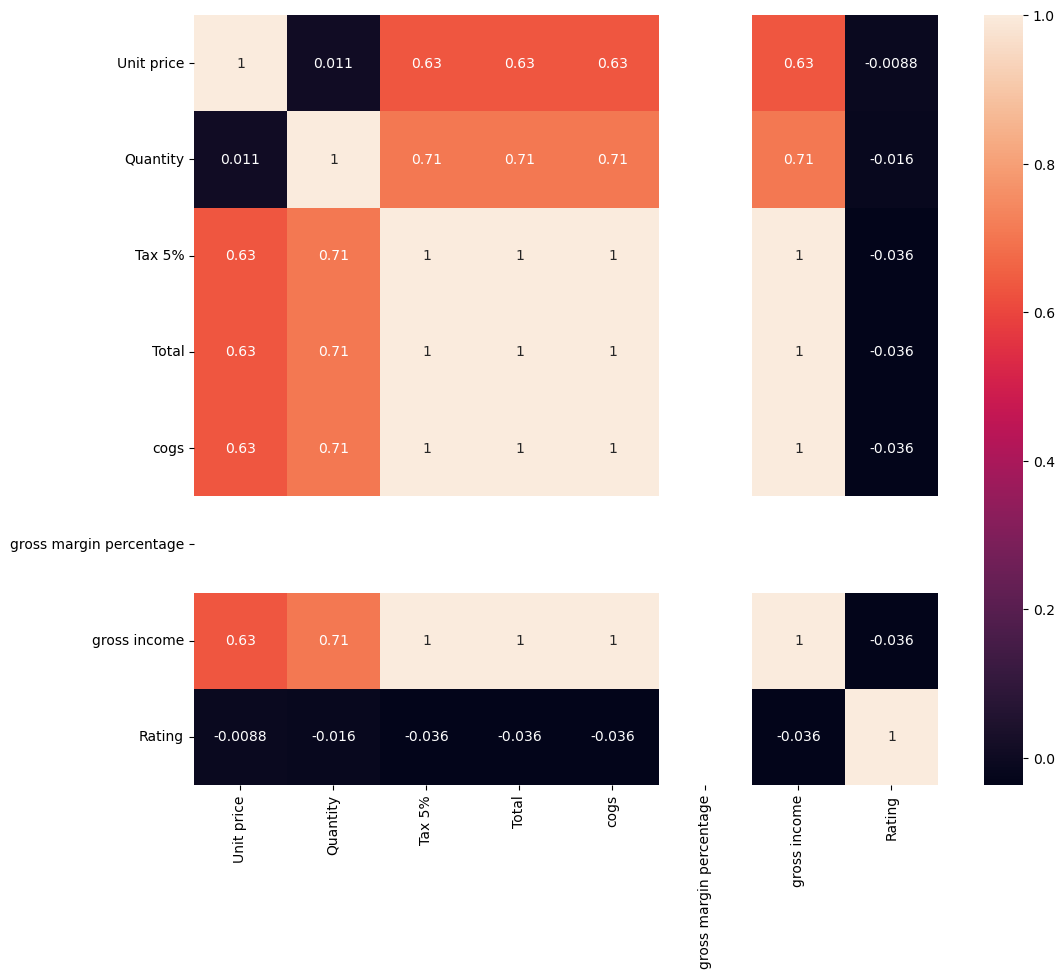

In [22]:
plt.figure(figsize = (12,10))

sns.heatmap(df.corr(), annot =True)

In [23]:
#lets find the categorialfeatures
list_1=list(df.columns)

In [24]:
list_cate=[]
for i in list_1:
    if df[i].dtype=='object':
        list_cate.append(i)

<a id="libraries"></a>
# <b><span style='color:#c78a44'> Label encoding</span></b>

![](https://miro.medium.com/max/772/1*QQe-4476Oy3_dI1vhb3dDg.png)

In [25]:
le=LabelEncoder()

In [26]:
for i in list_cate:
    df[i]=le.fit_transform(df[i])

In [27]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,814,0,2,0,0,3,74.69,7,26.1415,548.9715,26,146,2,522.83,4.761905,26.1415,9.1
1,142,2,1,1,0,0,15.28,5,3.8200,80.2200,87,23,0,76.40,4.761905,3.8200,9.6
2,653,0,2,1,1,4,46.33,7,16.2155,340.5255,81,155,1,324.31,4.761905,16.2155,7.4
3,18,0,2,0,1,3,58.22,8,23.2880,489.0480,19,485,2,465.76,4.761905,23.2880,8.4
4,339,0,2,1,1,5,86.31,7,30.2085,634.3785,57,29,2,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,153,2,1,1,1,3,40.35,1,2.0175,42.3675,21,174,2,40.35,4.761905,2.0175,6.2
996,250,1,0,1,0,4,97.38,10,48.6900,1022.4900,70,342,2,973.80,4.761905,48.6900,4.4
997,767,0,2,0,1,2,31.84,1,1.5920,33.4320,58,154,0,31.84,4.761905,1.5920,7.7
998,308,0,2,1,1,4,65.82,1,3.2910,69.1110,45,261,0,65.82,4.761905,3.2910,4.1


<a id="libraries"></a>
# <b><span style='color:#c78a44'> Splitting The Data into Training And Testing Dataset</span></b>

In [28]:
y=df['Gender']
x=df.drop('Gender',axis=1)

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

<a id="libraries"></a>
# <b><span style='color:#c78a44'> Building Machine Learning Models</span></b>

<a id="libraries"></a>
# <b><span style='color:#c78a44'> 1. K Nearest Neighbor</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #d8b26e; font-size:130%; text-align:left">
    
K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.

K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

![](https://cambridgecoding.files.wordpress.com/2016/01/knn2.jpg)

In [30]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [31]:
y_pred=knn.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.47      0.49      0.48       100
           1       0.47      0.45      0.46       100

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.47      0.47      0.47       200

Confusion Matrix:
 [[49 51]
 [55 45]]
Training Score:
 64.75


<a id="libraries"></a>
# <b><span style='color:#c78a44'> 2. Decision Tree</span></b>


<div style="border-radius:10px; padding: 15px; background-color: #d8b26e; font-size:130%; text-align:left">
    
A decision tree is a flowchart-like structure in which each internal node represents a test on a feature (e.g. whether a coin flip comes up heads or tails) , each leaf node represents a class label (decision taken after computing all features) and branches represent conjunctions of features that lead to those class labels. The paths from root to leaf represent classification rules.

![](https://regenerativetoday.com/wp-content/uploads/2022/04/dt.png)

In [32]:
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [33]:
y_pred=dtree.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.52      0.79      0.63       100
           1       0.56      0.27      0.36       100

    accuracy                           0.53       200
   macro avg       0.54      0.53      0.50       200
weighted avg       0.54      0.53      0.50       200

Confusion Matrix:
 [[79 21]
 [73 27]]
Training Score:
 63.87500000000001


<a id="libraries"></a>
# <b><span style='color:#c78a44'> 3. Random Forest</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #d8b26e; font-size:130%; text-align:left">
    
Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.

A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.

![](https://av-eks-blogoptimized.s3.amazonaws.com/33019random-forest-algorithm287548.png)

In [34]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [35]:
y_pred=rfc.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.50      0.54      0.52       100
           1       0.50      0.46      0.48       100

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.50      0.50       200

Confusion Matrix:
 [[54 46]
 [54 46]]
Training Score:
 100.0


<a id="libraries"></a>
# <b><span style='color:#c78a44'> 4. Gradient Boosting Classifier</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #d8b26e; font-size:130%; text-align:left">
    
The GradientBoostingClassifier is a machine learning model designed for classification tasks. It utilizes gradient boosting, an ensemble technique, to combine the predictions of multiple weak classifiers sequentially. With features like weighted voting, adjustable learning rates, and regularization parameters, it provides robust and accurate solutions for a wide range of classification problems. It is particularly useful when dealing with complex datasets and has applications in spam detection, fraud prevention, and image classification, among others.

![](https://www.researchgate.net/publication/351542039/figure/fig1/AS:11431281172877200@1688685833363/Flow-diagram-of-gradient-boosting-machine-learning-method-The-ensemble-classifiers.png)

In [36]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [37]:
y_pred=gbc.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gbc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.49      0.50      0.50       100
           1       0.49      0.48      0.48       100

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200

Confusion Matrix:
 [[50 50]
 [52 48]]
Training Score:
 88.0


<a id="libraries"></a>
# <b><span style='color:#c78a44'> Which is the best Model ?</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #d8b26e; font-size:130%; text-align:left">
As we see best Model is given by Random forest classifier(100% Accuracy).

<div style="border-radius:10px; padding: 15px; background-color: #9d8cd1; font-size:120%; text-align:left">
    
If you've made it this far, I hope you found my analysis enjoyable and informative.

If you found it helpful, please consider upvoting!

As a beginner, I welcome any suggestions and feedback in the comments section. Your input is highly valuable.

If you have any questions or uncertainties about any part of the notebook, please don't hesitate to leave a comment with your inquiries.

**Thank you for your time and attention!**